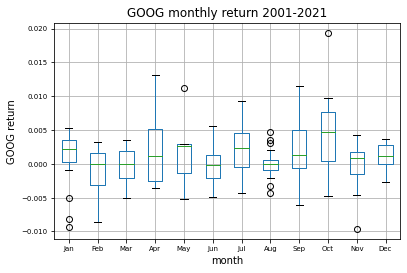

In [2]:
# Implementing advanced concepts, such as seasonality, in trading instruments

import pandas as pd
import matplotlib.pyplot as plt
import statistics as stats
from pandas_datareader import data

start_data = '2001-01-01'
end_data = '2021-01-01'
TICKER = 'GOOG'
FILENAME = TICKER + '_date_2001_2021.pkl'

try:
    goog_data = pd.read_pickle(FILENAME)
except FileNotFoundError:
    goog_data = data.DataReader(TICKER, 'yahoo', start_data, end_data)
    goog_data.to_pickle(FILENAME)

goog_monthly_return = goog_data['Adj Close'].pct_change().groupby(
    [goog_data['Adj Close'].index.year,
     goog_data['Adj Close'].index.month]).mean()

goog_montly_return_list = []
for i in range(len(goog_monthly_return)):
    goog_montly_return_list.append({'month': goog_monthly_return.index[i][1],
                                    'monthly_return': goog_monthly_return.values[i]})

goog_montly_return_list = pd.DataFrame(
    goog_montly_return_list, columns=('month', 'monthly_return'))

goog_montly_return_list.boxplot(column='monthly_return', by='month')

ax = plt.gca()
labels = [item.get_text() for item in ax.get_xticklabels()]
labels = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
          'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
ax.set_xticklabels(labels)
ax.set_ylabel('GOOG return')
plt.tick_params(axis='both', which='major', labelsize=7)
plt.title(TICKER + " monthly return 2001-2021")
plt.suptitle("")
plt.show()


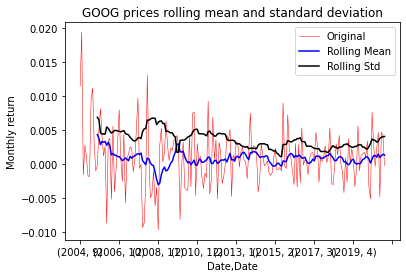

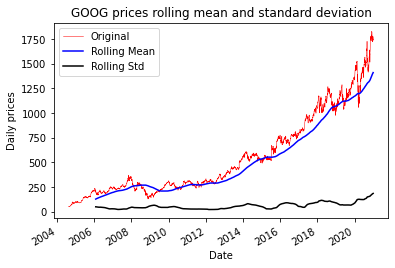

In [3]:
def plot_rolling_statistics_ts(ts, titletext, ytext, window_size=12):
    ts.plot(color='red', label='Original', lw=0.5)
    ts.rolling(window_size).mean().plot(
        color='blue', label='Rolling Mean')
    ts.rolling(window_size).std().plot(
        color='black', label='Rolling Std')

    plt.legend(loc='best')
    plt.ylabel(ytext)
    plt.title(titletext)
    plt.show(block=False)

plot_rolling_statistics_ts(
    goog_monthly_return[1:], TICKER + ' prices rolling mean and standard deviation', 'Monthly return')

plot_rolling_statistics_ts(
    goog_data['Adj Close'], TICKER + ' prices rolling mean and standard deviation', 'Daily prices', 365)


In [4]:
from statsmodels.tsa.stattools import adfuller

def test_stationarity(timeseries):
  print('Results of Dickey-Fuller Test:')
  dftest = adfuller(timeseries[1:], autolag='AIC')
  dfoutput = pd.Series(dftest[0:4], index=[
                       'Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
  print(dfoutput)


test_stationarity(goog_data['Adj Close'])
test_stationarity(goog_monthly_return[1:])


Results of Dickey-Fuller Test:
Test Statistic                    1.560288
p-value                           0.997733
#Lags Used                       30.000000
Number of Observations Used    4090.000000
dtype: float64
Results of Dickey-Fuller Test:
Test Statistic                -1.093421e+01
p-value                        9.651284e-20
#Lags Used                     1.000000e+00
Number of Observations Used    1.930000e+02
dtype: float64


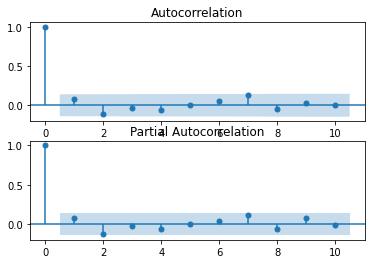

In [5]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from matplotlib import pyplot

pyplot.figure()
pyplot.subplot(211)
plot_acf(goog_monthly_return[1:], ax=pyplot.gca(), lags=10)

pyplot.subplot(212)
plot_pacf(goog_monthly_return[1:], ax=pyplot.gca(), lags=10)

pyplot.show()


In [ ]:
from statsmodels.tsa.arima_model import ARIMA

model = ARIMA(goog_monthly_return[1:], order=(2, 0, 2))

fitted_results = model.fit()

goog_monthly_return[1:].plot()

fitted_results.fittedvalues.plot(color='red')

plt.show()
